In [1]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from imblearn.under_sampling import *
from sklearn.feature_selection import *
from imblearn.ensemble import EasyEnsembleClassifier 
import warnings
warnings.filterwarnings("ignore")

In [2]:
s=read_csv('diabetes.csv')
s.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
219,5,112,66,0,0,37.8,0.261,41,1
294,0,161,50,0,0,21.9,0.254,65,0
593,2,82,52,22,115,28.5,1.699,25,0
644,3,103,72,30,152,27.6,0.730,27,0
243,6,119,50,22,176,27.1,1.318,33,1


In [3]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
s.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
def per(y):
    q1,q2=percentile(sorted(y),[25,75])
    low=q1-(1.5)*(q2-q1)
    high=q2+(1.5)*(q2-q1)
    return low,high

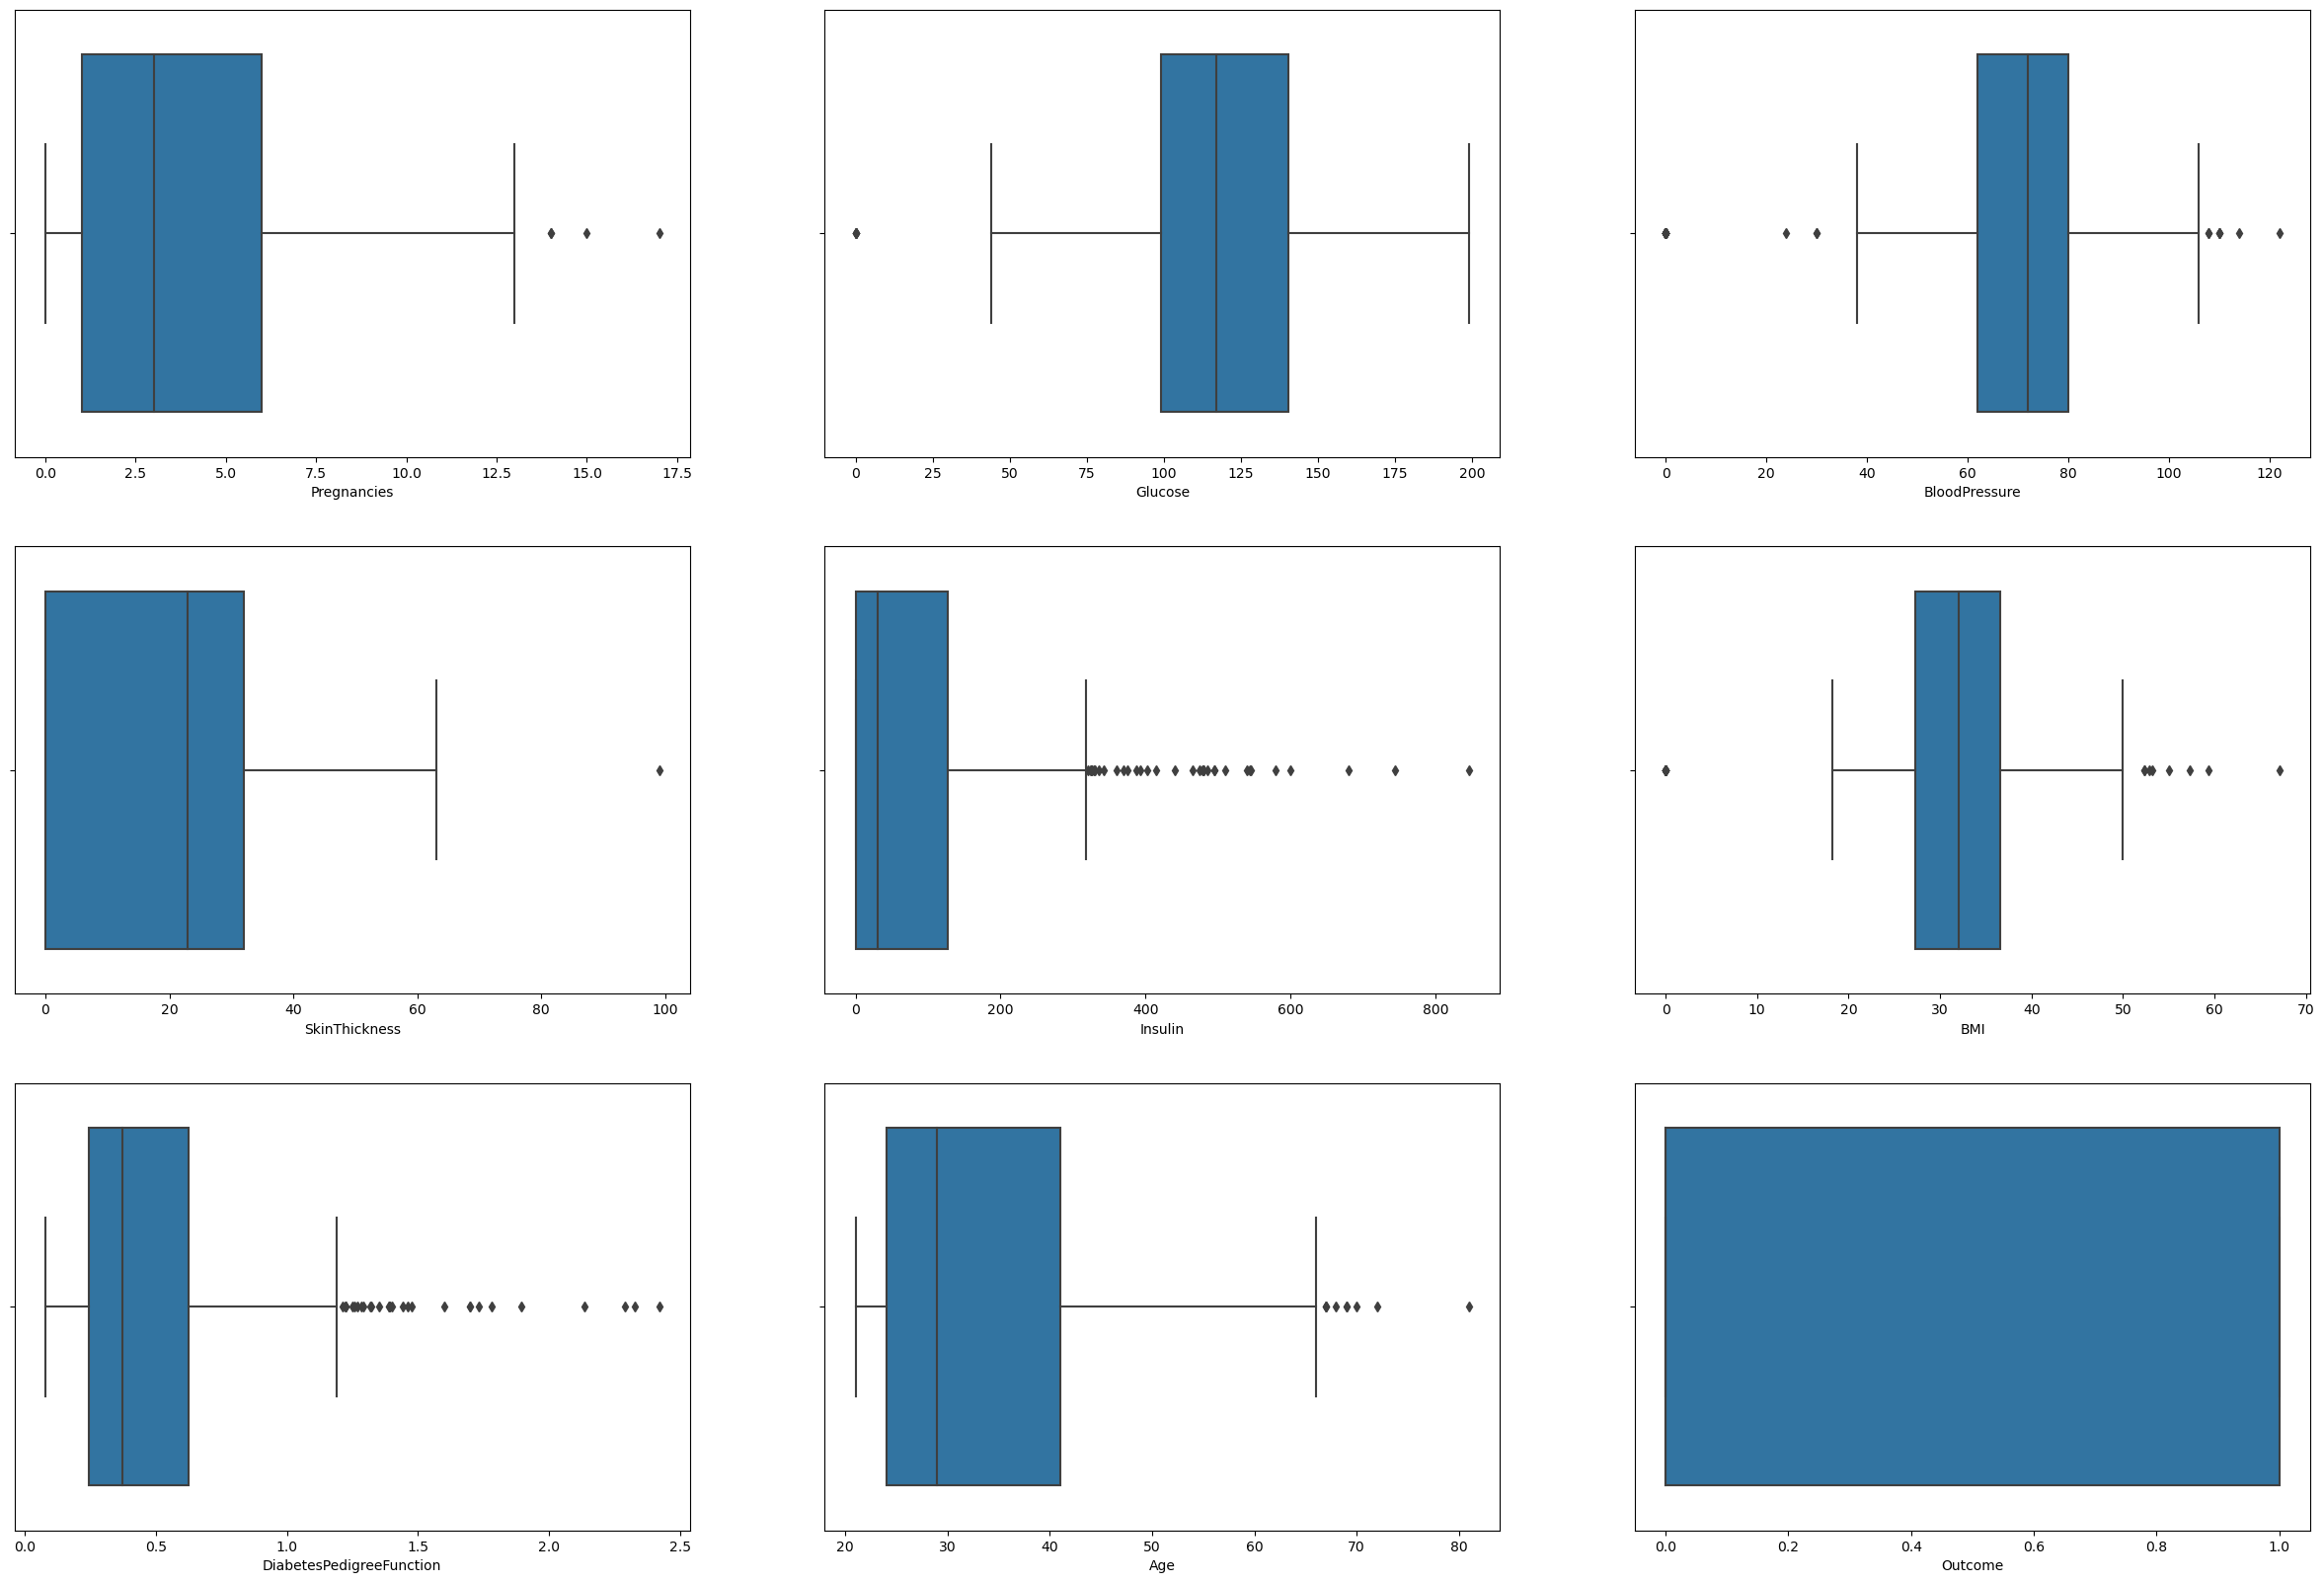

In [6]:
f,a=subplots(nrows=3,ncols=3,figsize=(30,20))
j,k=0,0
for i in s.columns:
    boxplot(s[i],ax=a[j,k])
    k=k+1
    if k==3:
        k=0
        j=j+1

In [7]:
for i in s.columns[:7]:
    low,high=per(s[i])
    s=s[(s[i]>low) & (s[i]<high)]

In [8]:
s=s[s.Glucose<195]
s=s[s.BloodPressure<=120]
s=s[s.Insulin<290]

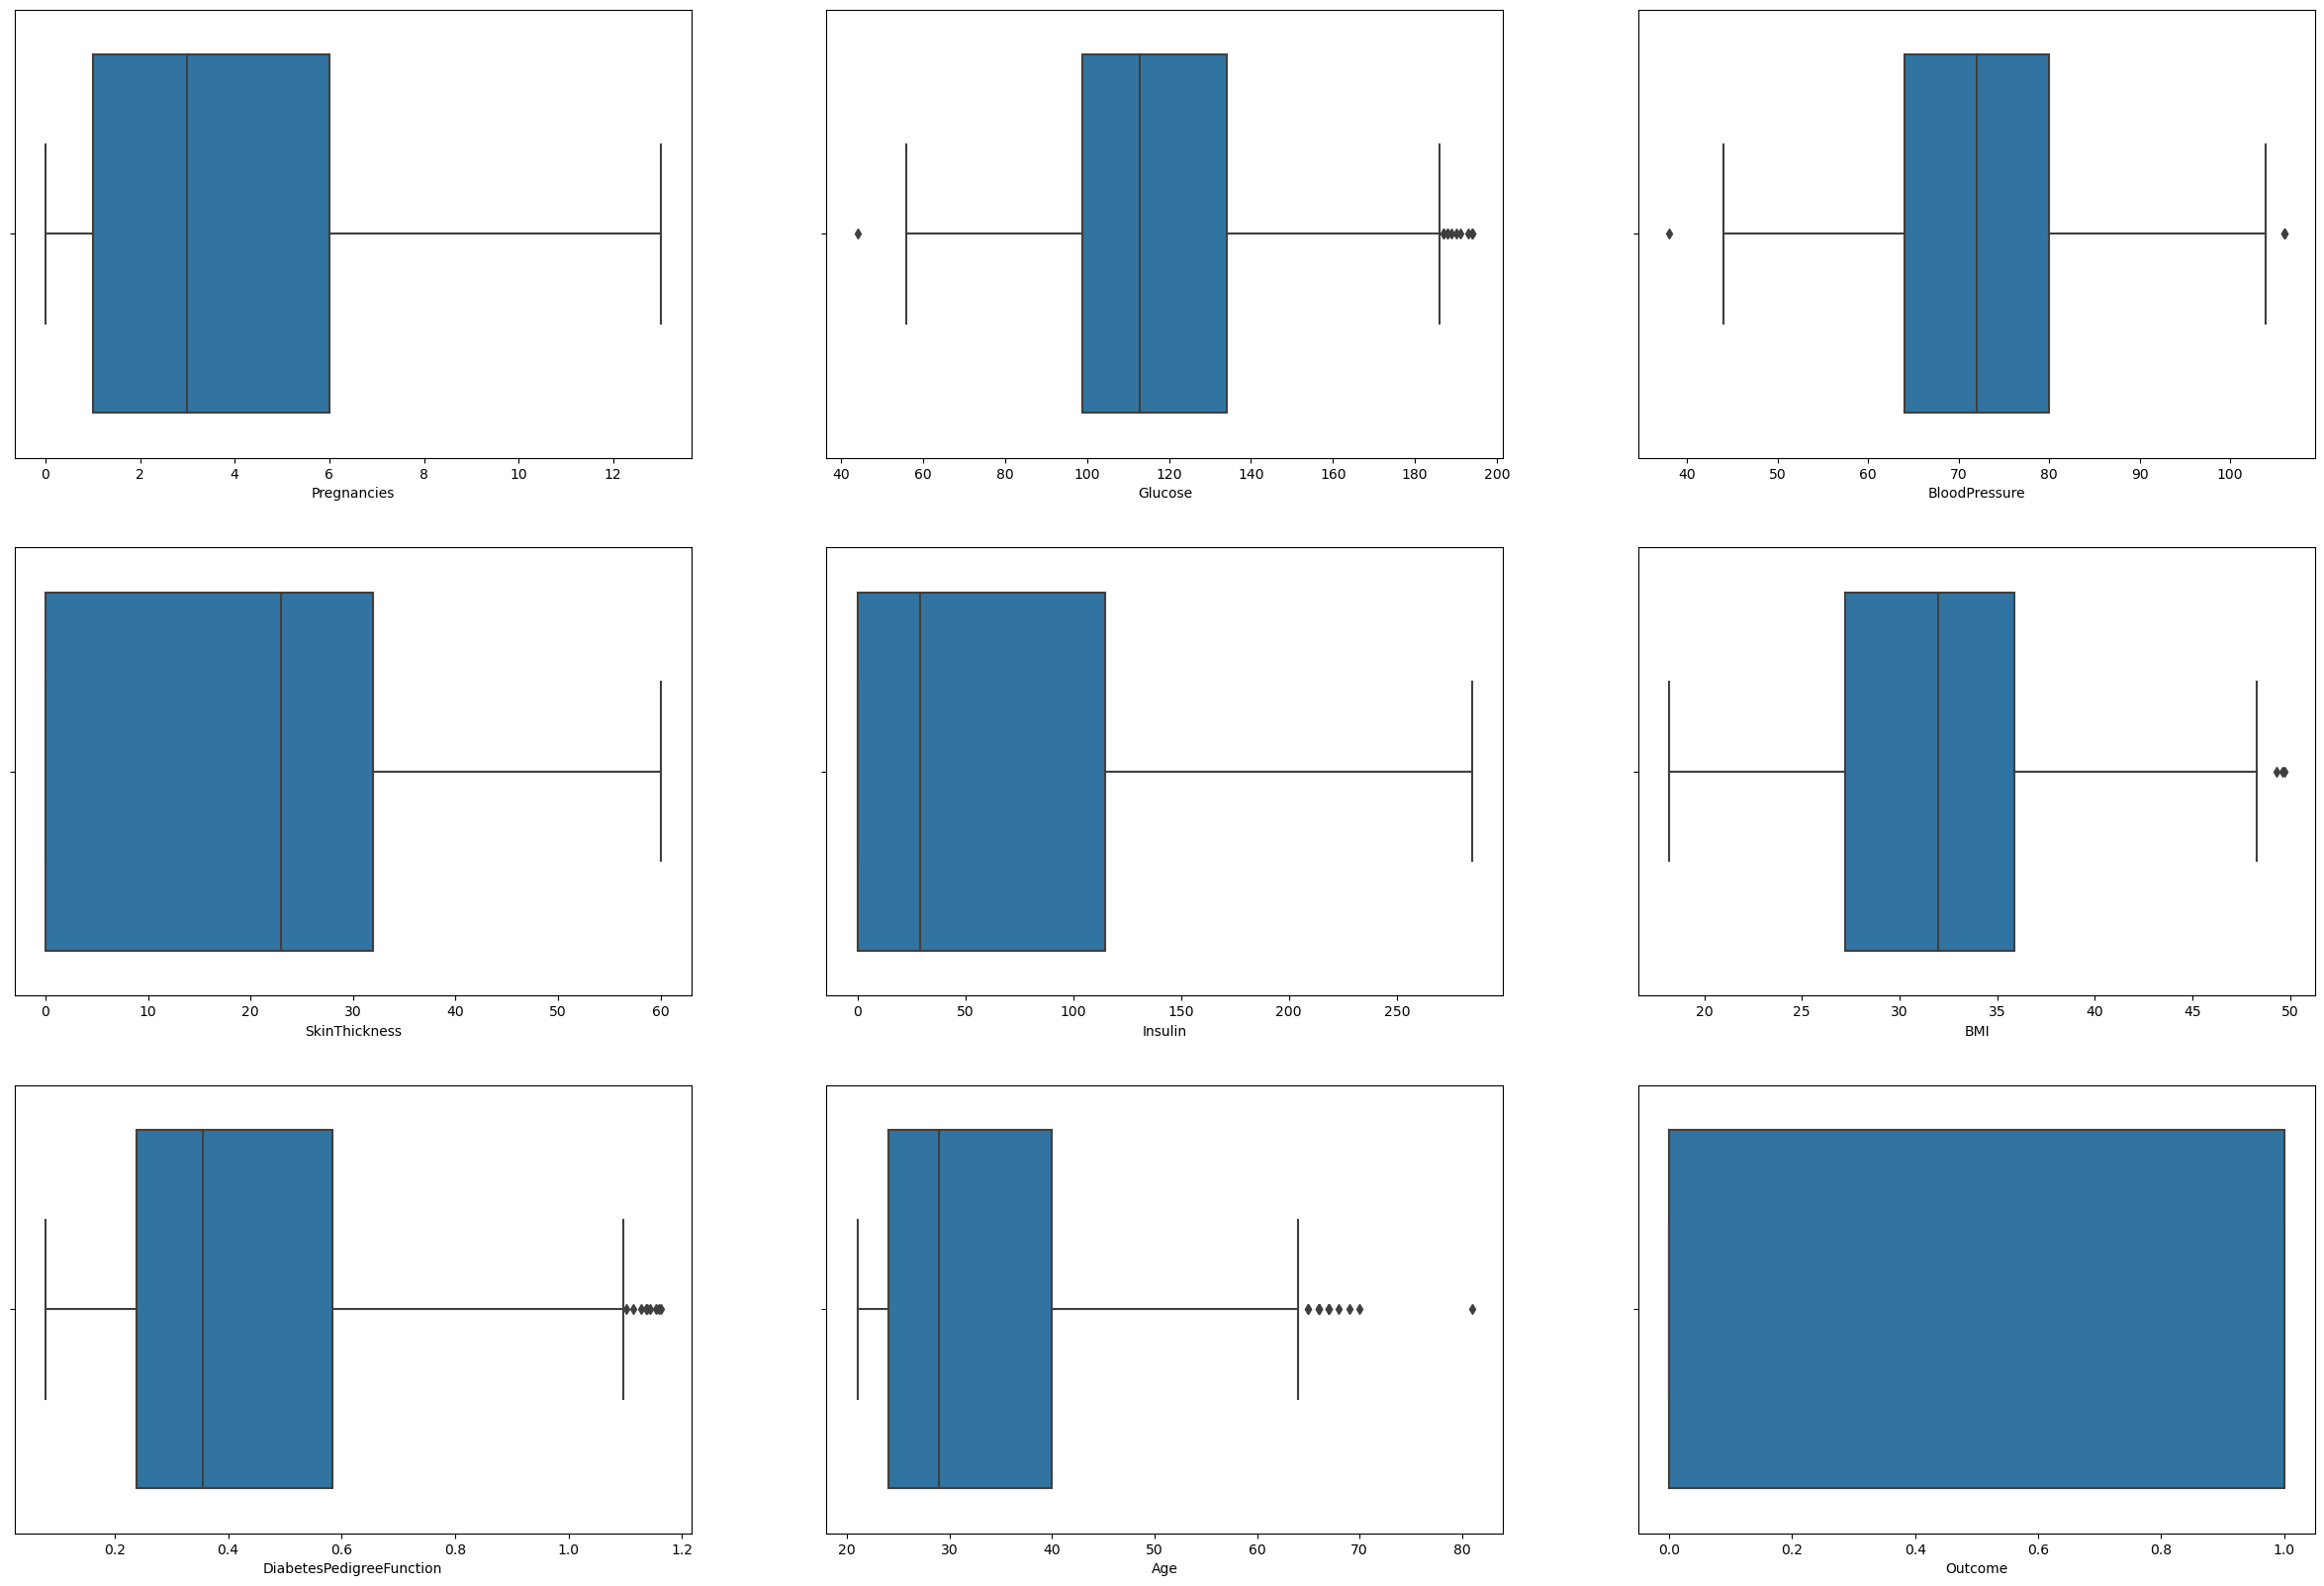

In [9]:
f,a=subplots(nrows=3,ncols=3,figsize=(30,20))
j,k=0,0
for i in s.columns:
    boxplot(s[i],ax=a[j,k])
    k=k+1
    if k==3:
        k=0
        j=j+1

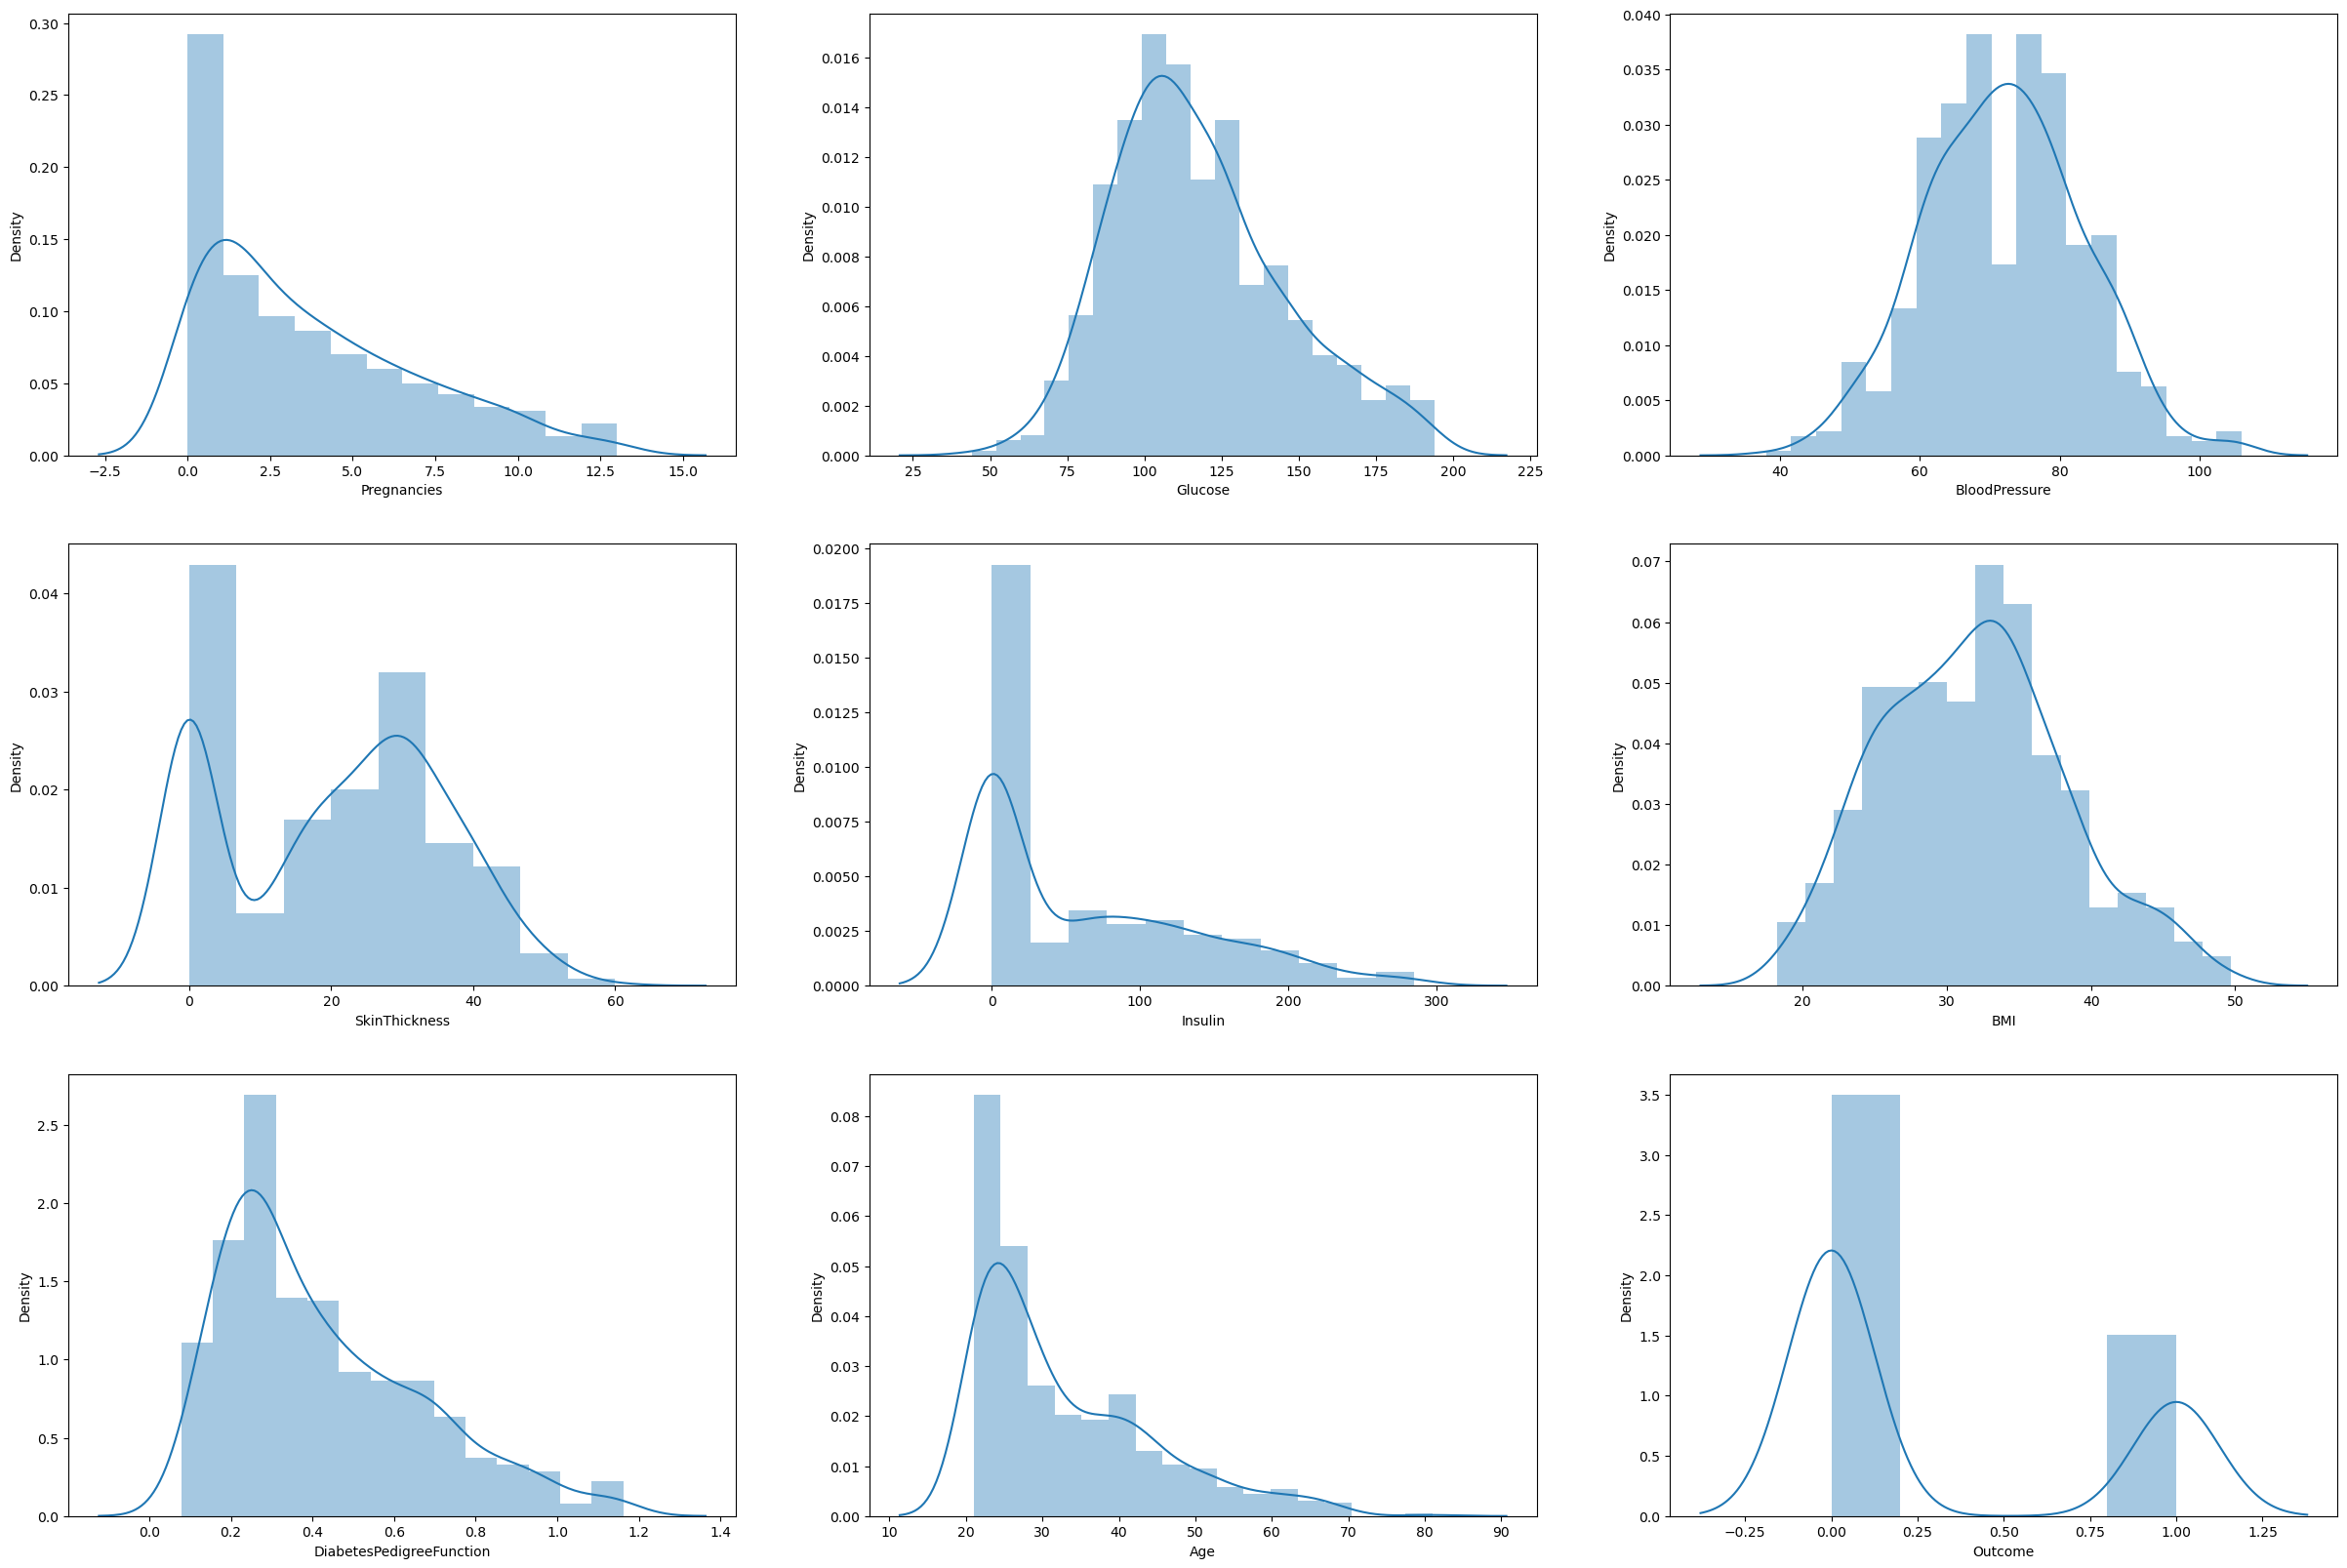

In [10]:
f,a=subplots(nrows=3,ncols=3,figsize=(30,20))
j,k=0,0
for i in s.columns:
    distplot(s[i],ax=a[j,k])
    k=k+1
    if k==3:
        k=0
        j=j+1

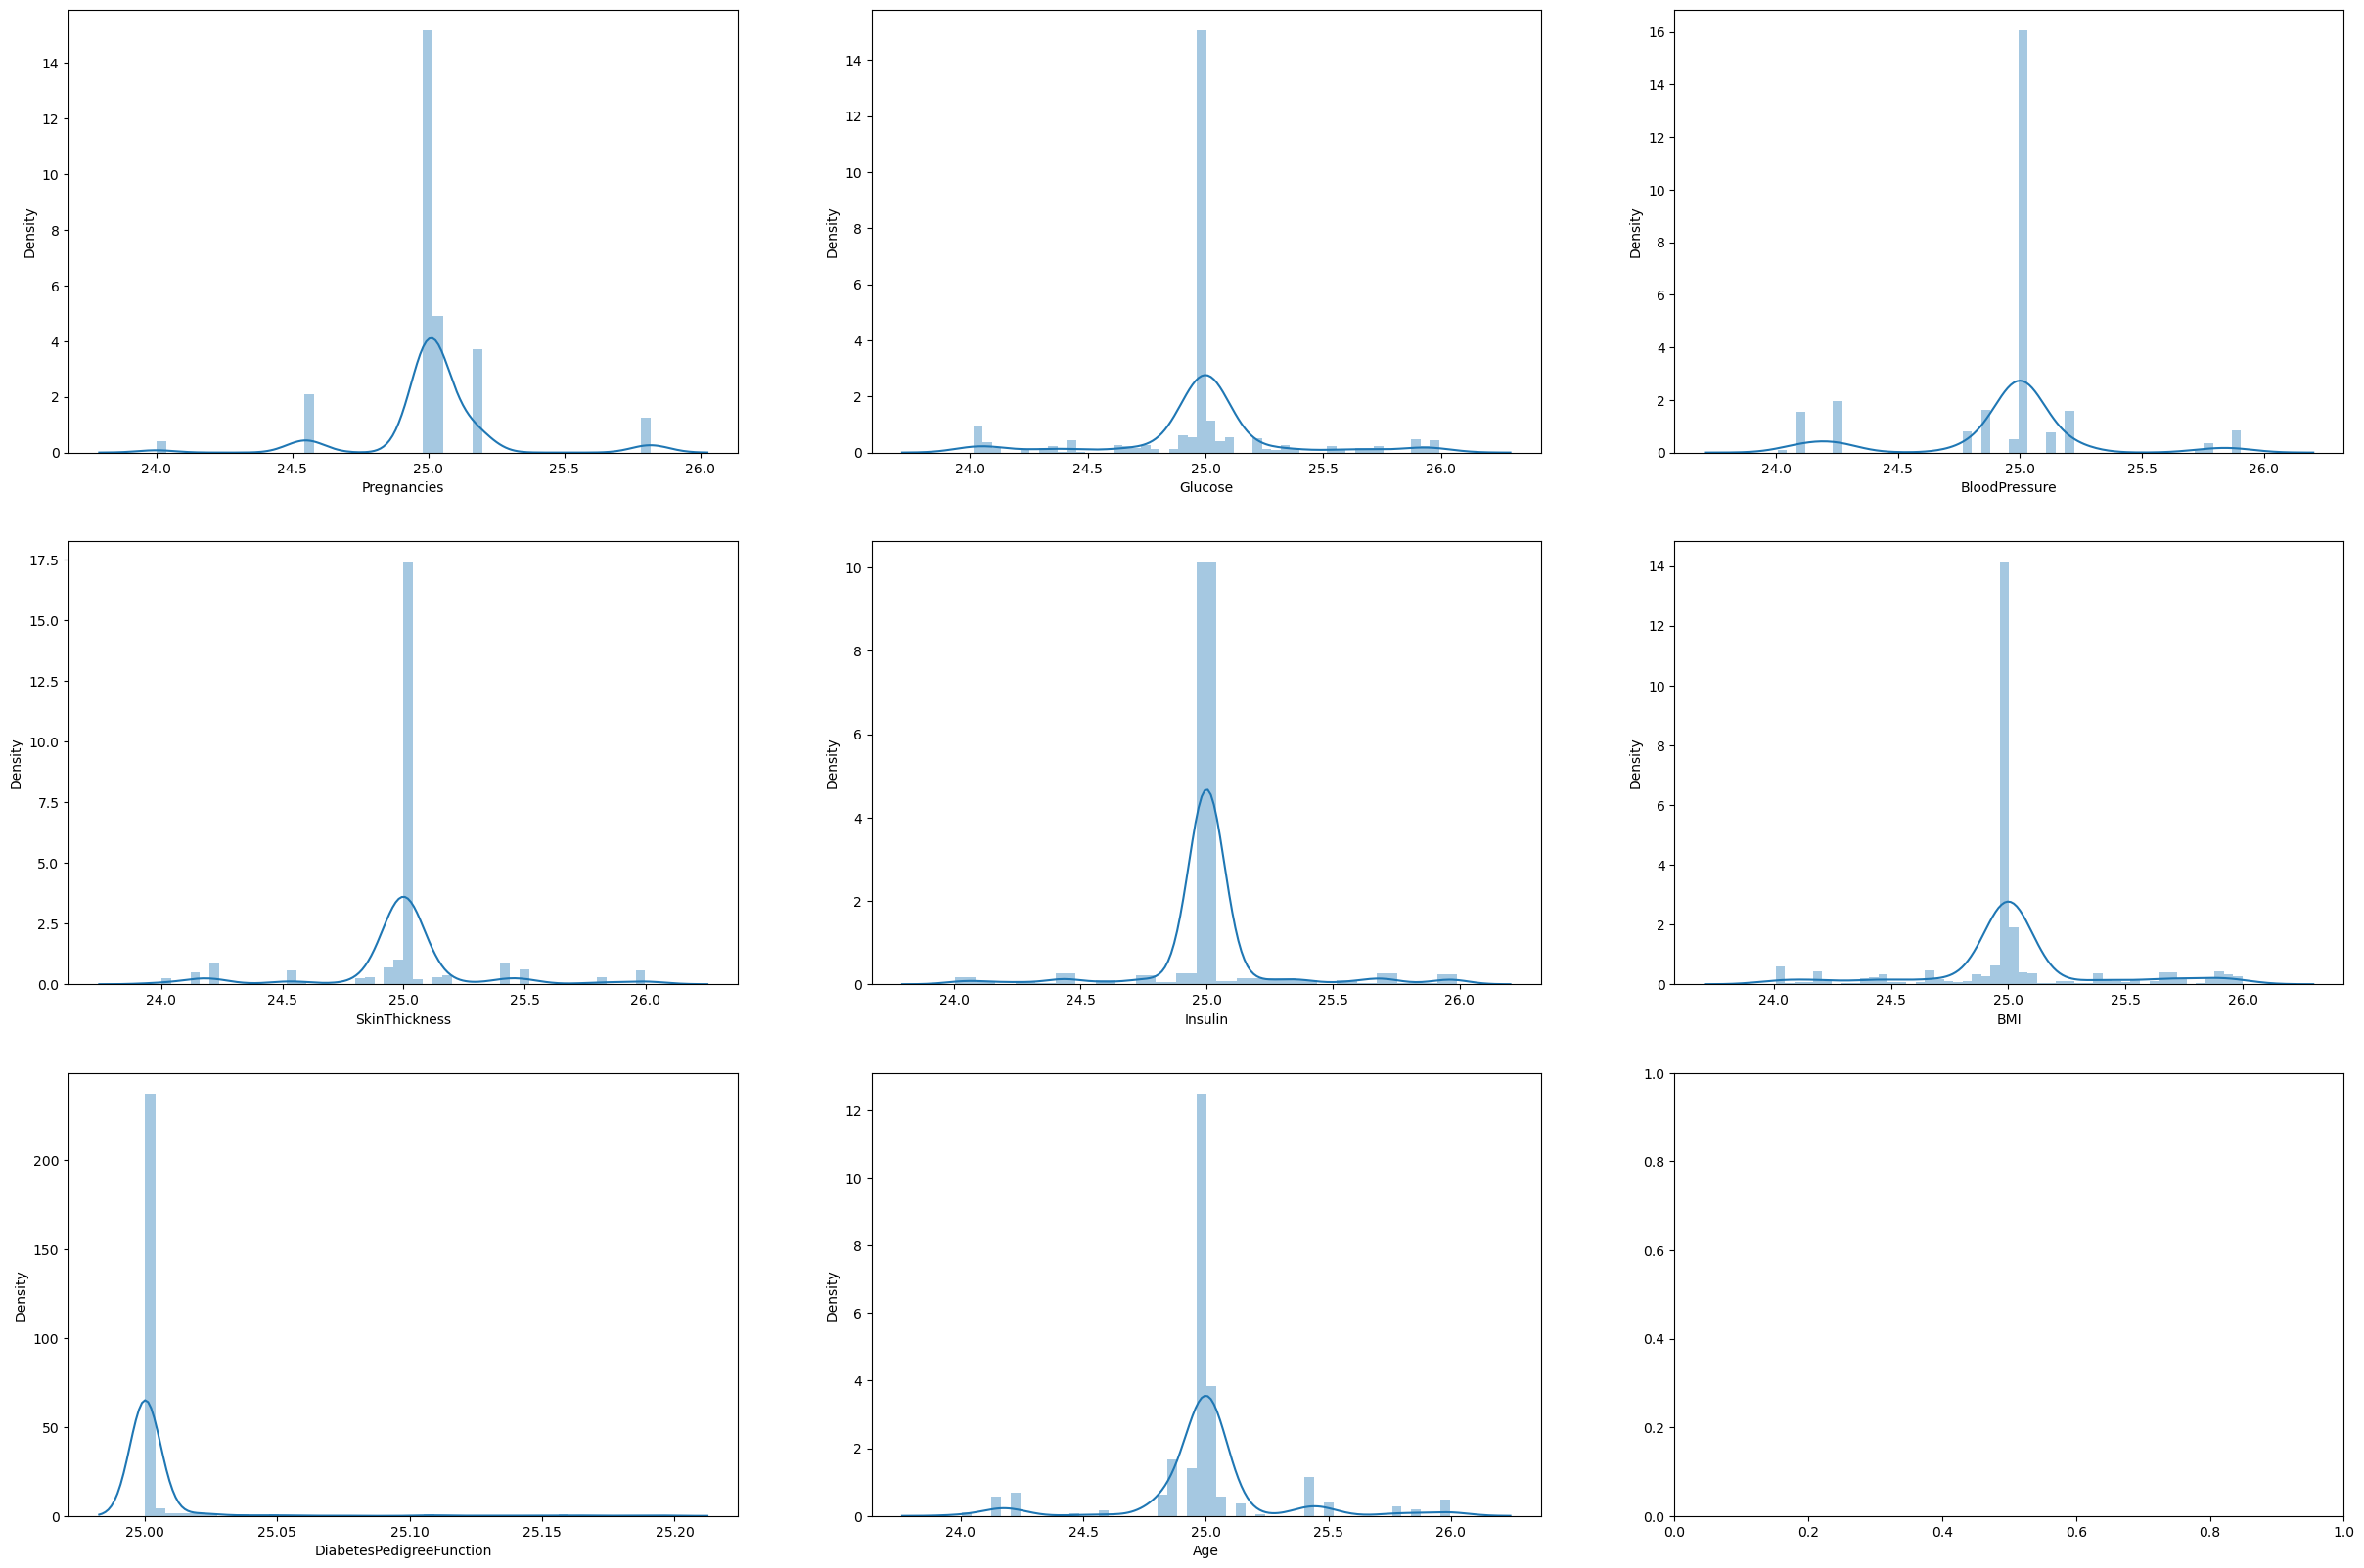

In [11]:
f,a=subplots(nrows=3,ncols=3,figsize=(30,20))
j,k=0,0
for i in s.columns[:-1]:
    distplot(sin(s[i])**19+25,ax=a[j,k])
    k=k+1
    if k==3:
        k=0
        j=j+1

In [12]:
mean(s.Glucose)

117.81717011128775

In [13]:
std(s.Glucose)

28.134640359815307

In [14]:
mean(s.BloodPressure)

72.07154213036566

In [15]:
std(s.BloodPressure)

11.32998193408107

In [16]:
s.skew()

Pregnancies                 0.840645
Glucose                     0.555253
BloodPressure               0.100207
SkinThickness              -0.042505
Insulin                     0.960107
BMI                         0.291918
DiabetesPedigreeFunction    0.914027
Age                         1.154592
Outcome                     0.872477
dtype: float64

In [17]:
var(s)

Pregnancies                   10.504599
Glucose                      791.557988
BloodPressure                128.368491
SkinThickness                236.282731
Insulin                     5653.349567
BMI                           41.004092
DiabetesPedigreeFunction       0.059244
Age                          136.115327
Outcome                        0.210191
dtype: float64

In [18]:
mean(s.SkinThickness)

20.324324324324323

In [19]:
std(s.SkinThickness)

15.371490853581678

In [20]:
mean(s.BMI)

31.891414944356075

In [21]:
std(s.BMI)

6.40344373276067

In [22]:
mean(s.DiabetesPedigreeFunction)

0.42422416534181256

In [23]:
std(s.DiabetesPedigreeFunction)

0.24339996783996107

In [24]:
s11,s12=SMOTE().fit_resample(s.drop('Outcome',axis=1),s['Outcome'])

In [25]:
m1=cross_val_score(ExtraTreesClassifier(),s11,s12,cv=5)

In [26]:
mean(m1)

0.8397727272727273

In [27]:
m2=cross_val_score(RandomForestClassifier(),s11,s12,cv=5)

In [28]:
mean(m2)

0.8295454545454545

In [29]:
m3=cross_val_score(EasyEnsembleClassifier(),s11,s12,cv=5)

In [30]:
m3

array([0.72159091, 0.69318182, 0.76704545, 0.84659091, 0.79545455])

In [31]:
m4=cross_val_score(LogisticRegression(),s11,s12,cv=5)

In [32]:
m4

array([0.70454545, 0.68181818, 0.76136364, 0.71590909, 0.79545455])

In [33]:
m5=cross_val_score(SVC(),s11,s12,cv=5)

In [34]:
m5

array([0.67613636, 0.72727273, 0.71022727, 0.72159091, 0.78409091])

In [35]:
m6=cross_val_score(AdaBoostClassifier(),s11,s12,cv=5)

In [36]:
m6

array([0.72159091, 0.69318182, 0.76704545, 0.84659091, 0.79545455])

In [37]:
x_train,x_test,y_train,y_test=train_test_split(s11,s12,stratify=s12,test_size=0.2)

In [38]:
model1=ExtraTreesClassifier().fit(x_train,y_train)

In [39]:
model1

ExtraTreesClassifier()

In [40]:
y_pred=model1.predict(x_test)

<AxesSubplot:ylabel='Outcome'>

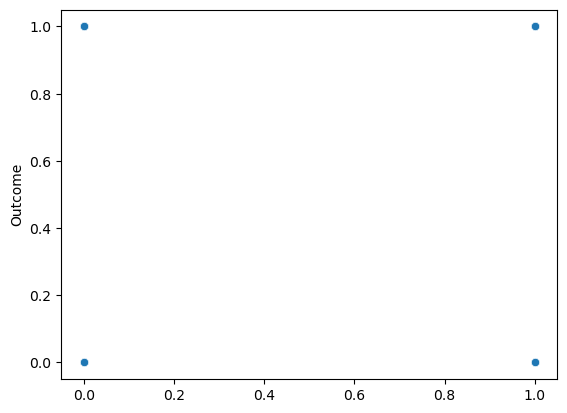

In [41]:
scatterplot(y_pred,y_test)

<AxesSubplot:>

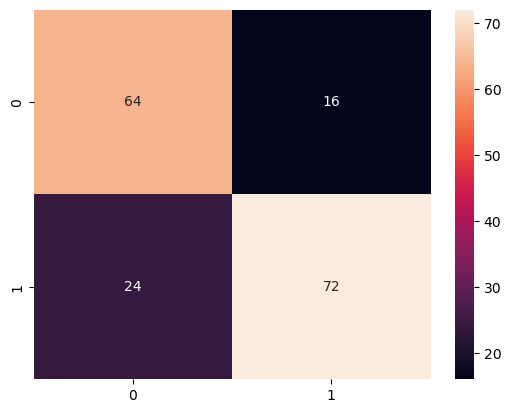

In [43]:
heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        80
           1       0.82      0.75      0.78        96

    accuracy                           0.77       176
   macro avg       0.77      0.78      0.77       176
weighted avg       0.78      0.77      0.77       176



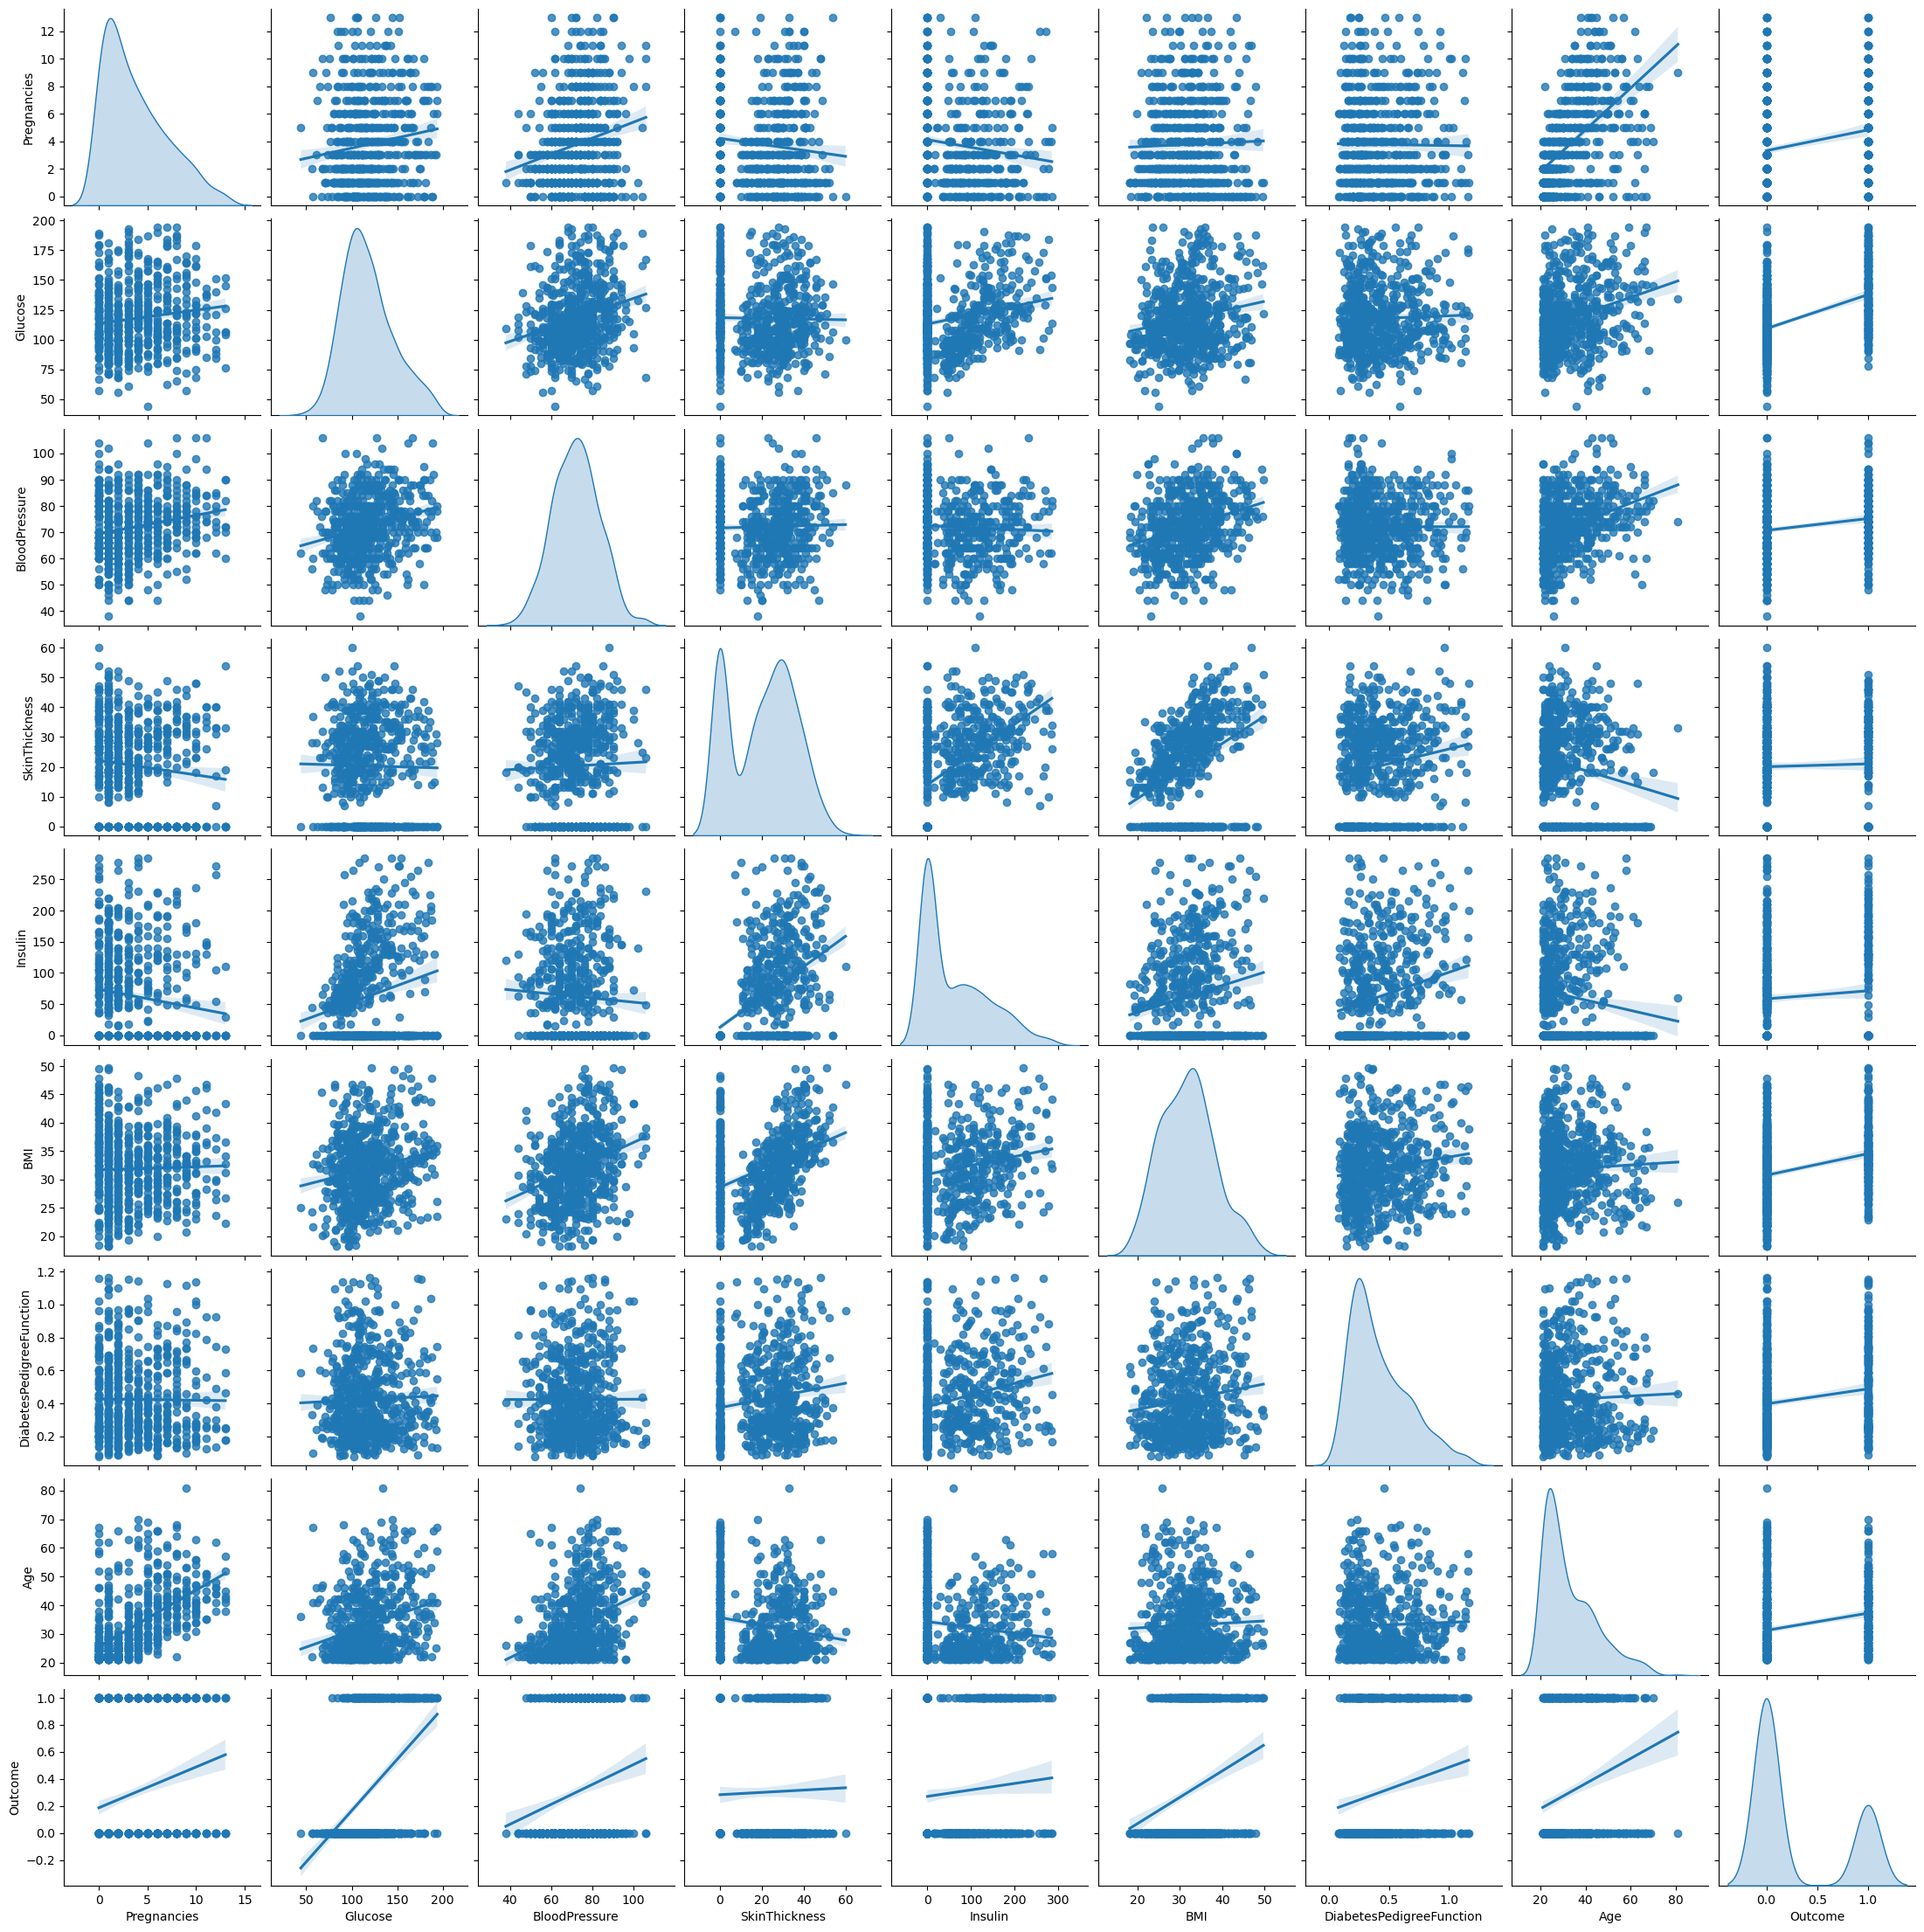

In [47]:
pairplot(s,diag_kind='kde',kind='reg')